# Least Squares

Para el modelo de regresión lineal:

$$h(x)=\beta_0 + \beta_1.x$$

Tenemos un conjunto de observaciones en el caso de una sola variable:

$$(x_0,y_0),(x_1,y_1),(x_2,y_2),(x_3,y_3)...(x_n,y_n)$$

Un criterio posible es encontrar los parámetros $\beta_0$ y $\beta_1$ tal que minimicen la función de costo:

$$J(\beta_0,\beta_1)=\frac{1}{2.n}\sum_{i=0}^{n}(y_i-h_{\beta_0,\beta_1}(x_i))^2=\frac{1}{2.n}\sum_{i=0}^{n}(y_i-\beta_0 - \beta_1.x_i)^2$$

Por ejemplo, vamos a trabajar con el siguiente dataset:

http://www.stat.ufl.edu/~winner/data/lsd.dat

Descripción:

Dataset:  lsd.dat
Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

Tissue Concentration    1-4
Math Score             8-12

http://www.stat.ufl.edu/~winner/data/lsd.txt


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/lsd.dat", sep="   ", header=None, names=["Tissue Concentration","Math Score"],engine="python")
print(df.head())

   Tissue Concentration  Math Score
0                  1.17       78.93
1                  2.97       58.20
2                  3.26       67.47
3                  4.69       37.47
4                  5.83       45.65


In [3]:
print(df.values[:,0]) #Muestro los valores que leí
print(df.values[:,1]) #Muestro los valores que leí
i=df.shape[0]
print("Cantidad de mediciones:" + str(i))

[ 1.17  2.97  3.26  4.69  5.83  6.    6.41]
[ 78.93  58.2   67.47  37.47  45.65  32.92  29.97]
Cantidad de mediciones:7


In [10]:
#Aplico la solución por regresión lineal utilizando sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df.values[:,0,np.newaxis], df.values[:,1])
print(lm.intercept_)
print(lm.coef_)

89.123873768
[-9.00946642]


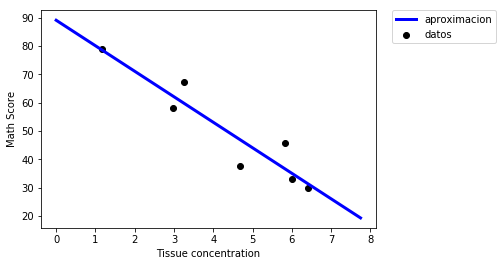

In [15]:
#Veamos cómo da la aproximación buscada, y comparemosla con los datos medidos
x=np.arange(0,8,0.25)
y=lm.intercept_+lm.coef_*x

plt.scatter(df.values[:,0], df.values[:,1],  color='black', label='datos')
plt.plot(x, y, color='blue', linewidth=3,label='aproximacion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Tissue concentration')
plt.ylabel('Math Score')
plt.show()

Dado que es un modelo de sólo dos parámetros (intercept y coef), podríamos graficar la función de costo en función de los dos parámetros, para determinar dónde está el mínimo visualmente:

(40, 360)


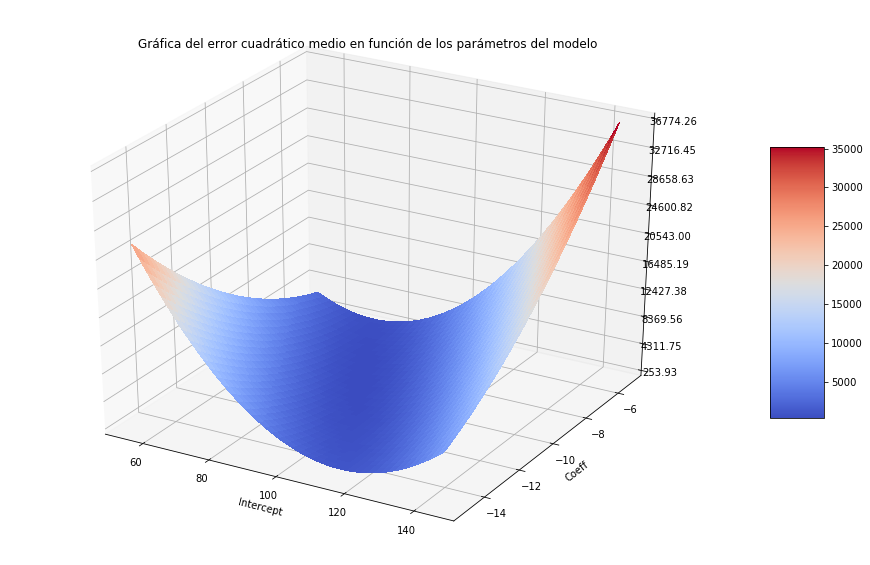

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
beta0 = np.arange(55, 145, 0.25)
beta1 = np.arange(-15, -5, 0.25)
beta0,beta1 = np.meshgrid(beta0, beta1)
J=[(beta0+beta1*df.values[i,0]-df.values[i,1])**2 for i in range(df.shape[0])]
J=np.array(J)
J=J.sum(axis=0)        
print(J.shape)
# Plot the surface.
surf = ax.plot_surface(beta0, beta1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Gráfica del error cuadrático medio en función de los parámetros del modelo')
plt.xlabel('Intercept')
plt.ylabel('Coeff')
plt.show()

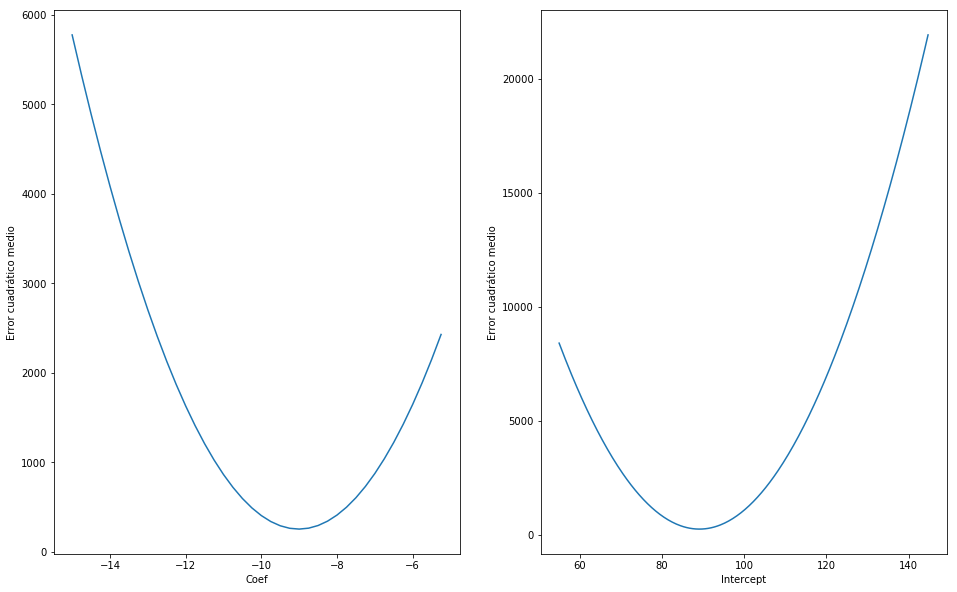

In [25]:
import matplotlib.pyplot as plt
beta0 = np.arange(55, 145, 0.25)
beta1 = np.arange(-15, -5, 0.25)
fig, axs = plt.subplots(1, 2,figsize=(16,10))
J=[(lm.intercept_+beta1*df.values[i,0]-df.values[i,1])**2 for i in range(df.shape[0])]
J=np.array(J)
J=J.sum(axis=0)        
axs[0].plot(beta1,J)
axs[0].set_xlabel('Coef')
axs[0].set_ylabel('Error cuadrático medio')
J=[(beta0+lm.coef_[0]*df.values[i,0]-df.values[i,1])**2 for i in range(df.shape[0])]
J=np.array(J)
J=J.sum(axis=0)        
axs[1].plot(beta0,J)
axs[1].set_xlabel('Intercept')
axs[1].set_ylabel('Error cuadrático medio')
plt.show()

## ¿Cómo podemos encontrar los valores que minimizan la función de costo?

Debido a la naturaleza cuadrática de la función de costo, la función es convexa. El mínimo de la función coincide con el sector "plano" de la función de costo. Es decir, el mínimo de la función estará en el el lugar en el que:

$$\frac{\partial J(\beta_0,\beta_1)}{\partial \beta_0} = \frac{\partial J(\beta_0,\beta_1)}{\partial \beta_1}=0$$

Si utilizamos notación vectorial:

$$\mathbf{b}=[\beta_0,\beta_1]$$
$$\mathbf{X}^T=\left( \begin{array}{ccc}
1 & 1 & ... & 1 \\
x_0 & x_1 & ... & x_n \end{array} \right)$$ 
$$\mathbf{y}=[y_0,y_1,...,y_n]$$
$$\mathbf{h}(\mathbf{b})=\mathbf{b}.\mathbf{X}^T$$
$$J=||\mathbf{b}.\mathbf{X}^T-\mathbf{y}||^2$$
$$\mathbf{b}^o=argmin_{\mathbf{b}}J(\mathbf{b})$$

Podemos hallar $\mathbf{b}^o$ haciendo $\nabla(J)=0$

$J=(\mathbf{b}.\mathbf{X}^T-\mathbf{y})(\mathbf{b}\mathbf{X}^T-\mathbf{y})^T=\mathbf{y}^T\mathbf{y}-\mathbf{b}^T\mathbf{X}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}\mathbf{b}+\mathbf{b}^T\mathbf{X}^T\mathbf{X}\mathbf{b}=\mathbf{y}^T\mathbf{y}-2\mathbf{b}^T\mathbf{X}^T\mathbf{y}+\mathbf{b}^T\mathbf{X}^T\mathbf{X}\mathbf{b}$

Si derivamos con respecto a $\mathbf{b}$ e igualamos a cero:

$\nabla(J)=-\mathbf{X}^T\mathbf{y}+(\mathbf{X}^T\mathbf{X})\mathbf{b}^o=0$

Si $\mathbf{X}^T\mathbf{X}$ es inversible (en general en la pŕactica lo es) entonces podemos despejar $\mathbf{b}^o$:

$\mathbf{b}^o=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

A continuación podemos calcular $\mathbf{b}^o$ utilizando numpy:

In [6]:
#Construyo X de dos dimensiones, donde una de las dimensiones vale siempre uno, ya que es el bias.
X=np.array([np.ones(df.values.shape[0]),(df.values[:,0])])
X

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.17,  2.97,  3.26,  4.69,  5.83,  6.  ,  6.41]])

In [7]:
#Aplico manualmente la fórmula para calcular los parámetros 
from numpy.linalg import inv
np.dot(np.dot(inv(np.dot(X,X.T)),X),df.values[:,1])

array([ 89.12387377,  -9.00946642])

In [9]:
#Muestro el valor de 
print(lm.intercept_)
print(lm.coef_)

89.123873768
[-9.00946642]
